In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# 1. Veri Yükleme,Tanıma ve GÖrselleştirme

In [15]:
df = pd.read_csv('housing.csv')

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


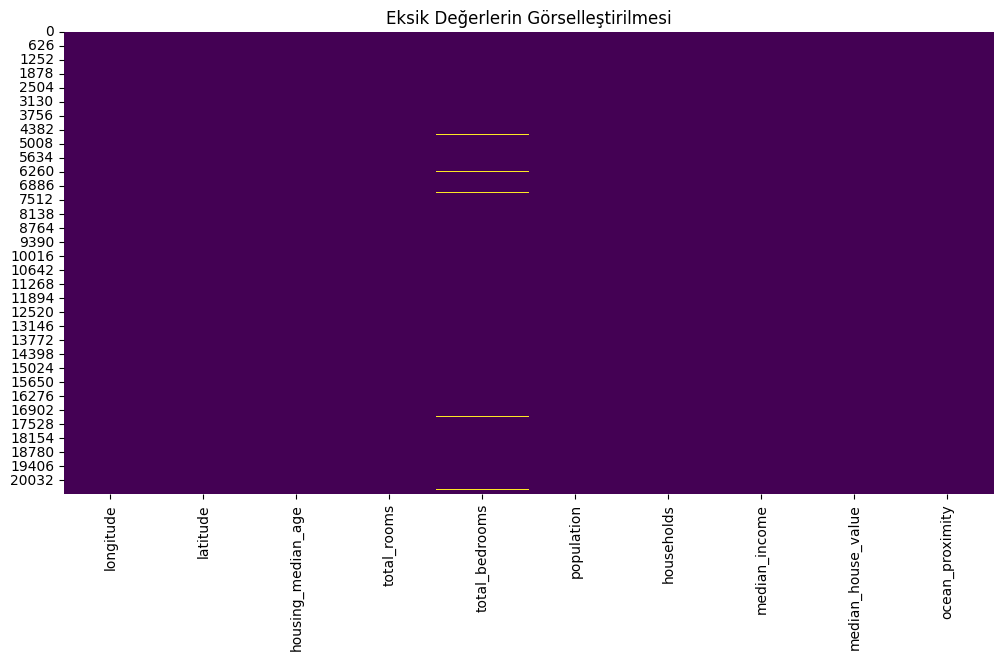

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Değerlerin Görselleştirilmesi')
plt.show()


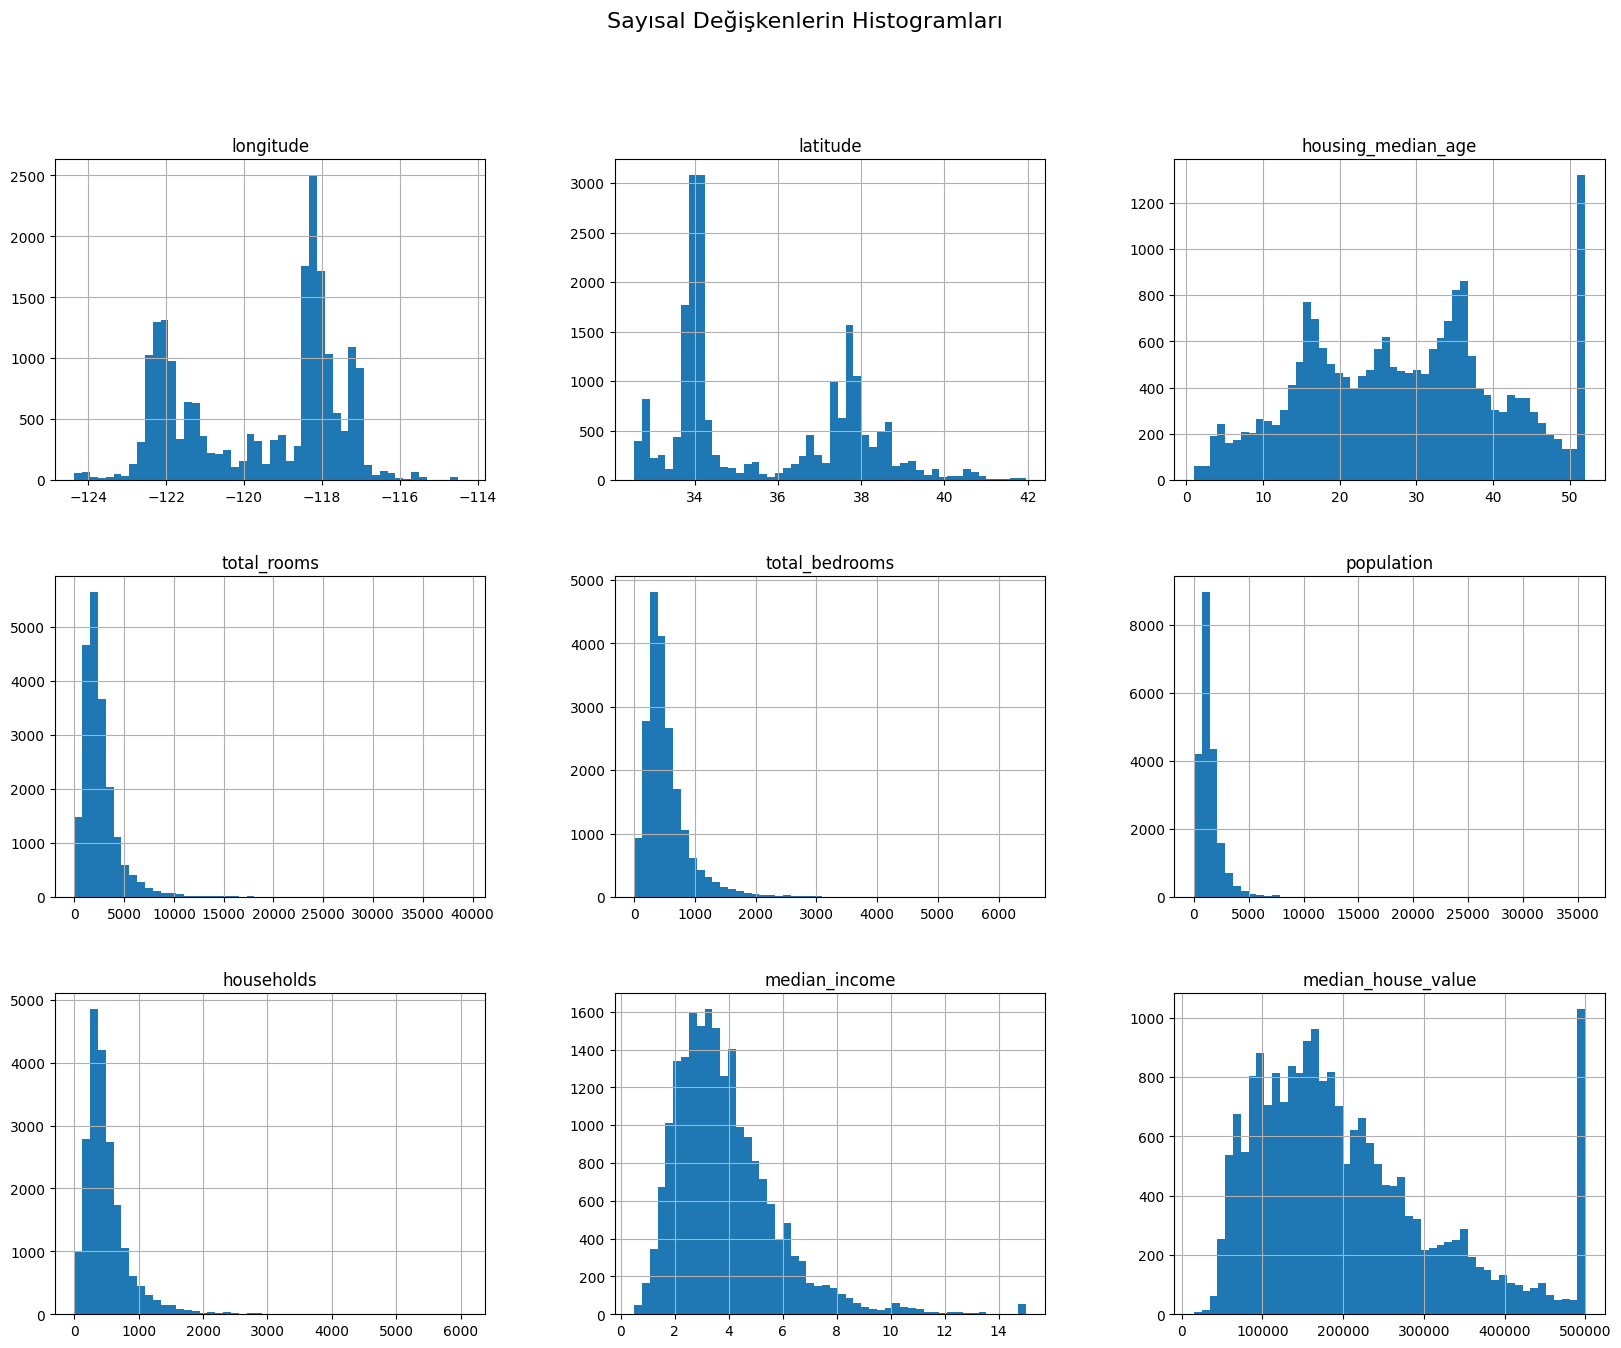

In [22]:
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Sayısal Değişkenlerin Histogramları", fontsize=16)
plt.show()

C:\Users\Furkan\AppData\Local\Temp\ipykernel_2184\470865073.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


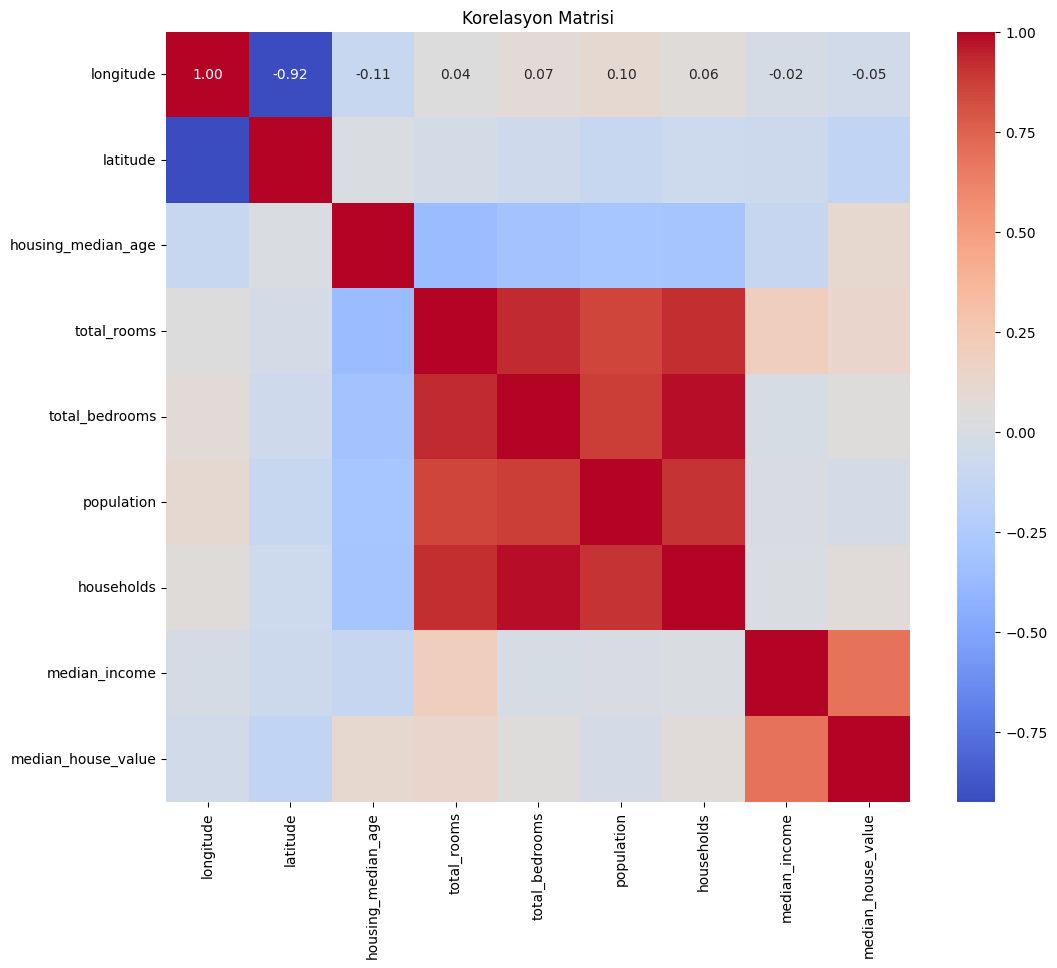

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

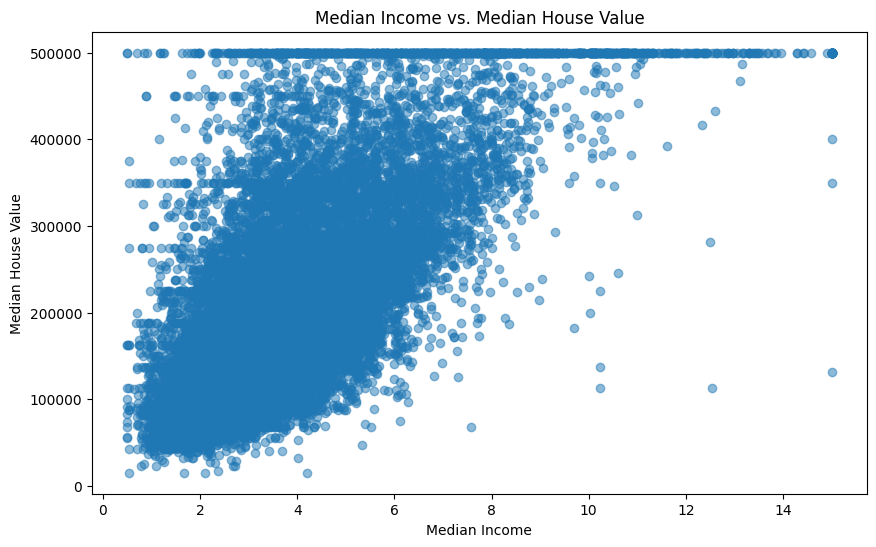

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'],df['median_house_value'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')
plt.show()

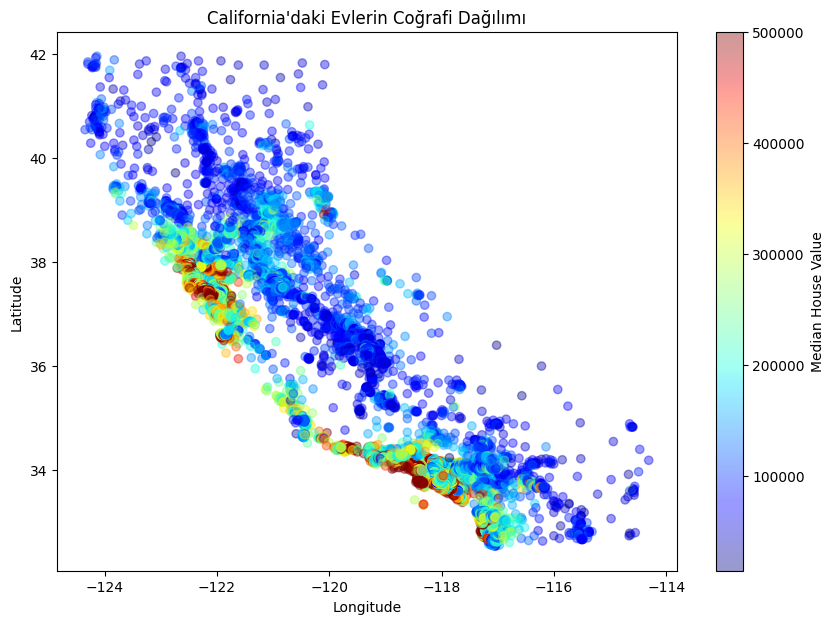

In [25]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(df["longitude"], df["latitude"], alpha=0.4, 
                      c=df["median_house_value"], cmap="jet")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California'daki Evlerin Coğrafi Dağılımı")
plt.colorbar(scatter, label="Median House Value")
plt.show()

In [26]:
df.duplicated().sum()

0

In [27]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [29]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0.5, 1.0, 'Distribution of Ocean Proximity')

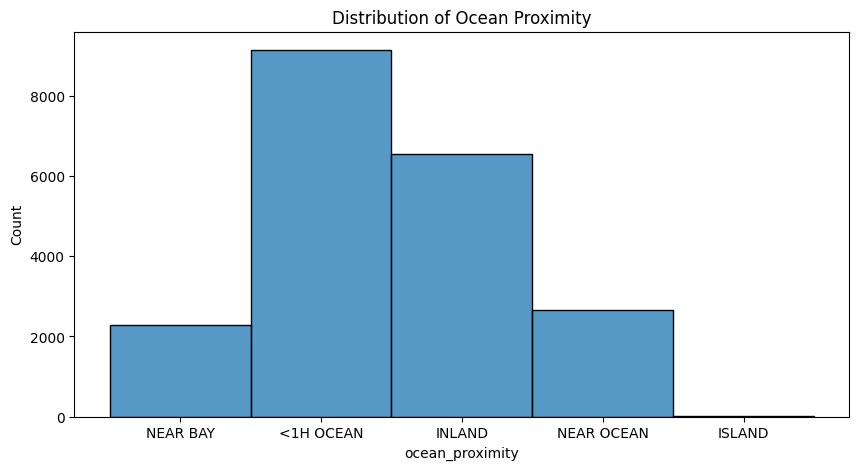

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='ocean_proximity')

plt.title('Distribution of Ocean Proximity')

In [13]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Veri Ön İşleme

In [31]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Sayısal sütunlarda eksik değerleri medyan ile doldurma
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        # Yorum: '{}' sütunundaki eksik değerler medyan değeri ile dolduruldu. 
        print(f"{col} sütunundaki eksik değerler medyan ile dolduruldu.")

# Kategorik sütunlarda eksik değerleri mod ile doldurma
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        # Yorum: '{}' sütunundaki eksik değerler en sık görülen değer (mod) ile dolduruldu.
        print(f"{col} sütunundaki eksik değerler mod ile dolduruldu.")

total_bedrooms sütunundaki eksik değerler medyan ile dolduruldu.


In [86]:
df_copy = df

In [32]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [33]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nKategorik veriler one-hot encoding ile dönüştürüldü.")


Kategorik veriler one-hot encoding ile dönüştürüldü.


In [35]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


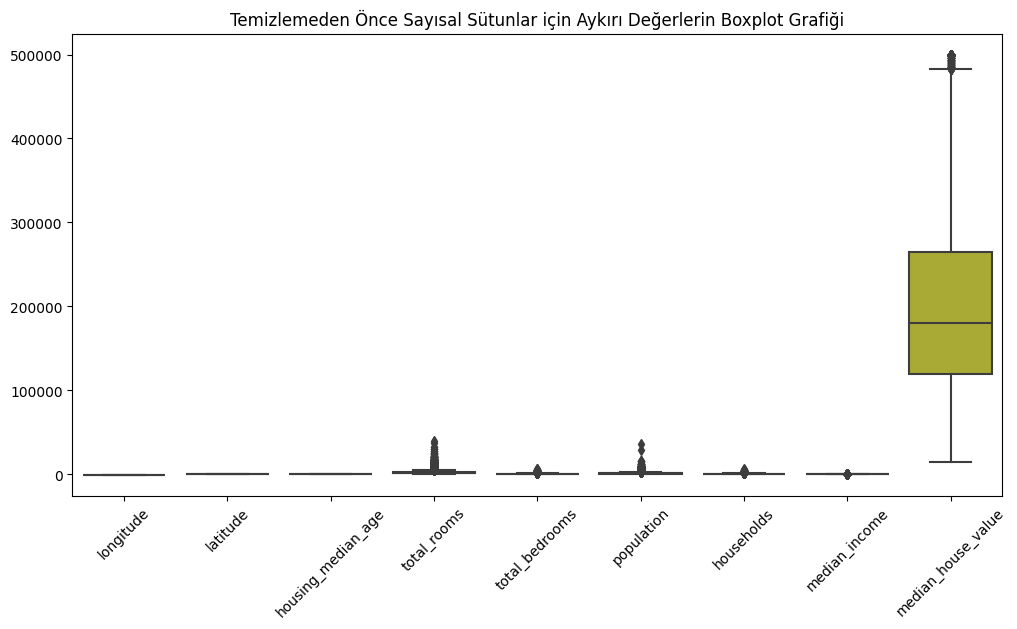

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Temizlemeden Önce Sayısal Sütunlar için Aykırı Değerlerin Boxplot Grafiği")
plt.xticks(rotation=45)  # x ekseni etiketlerinin daha okunaklı olması için döndürülmesi
plt.show()


Aykırı değerler temizlendi.


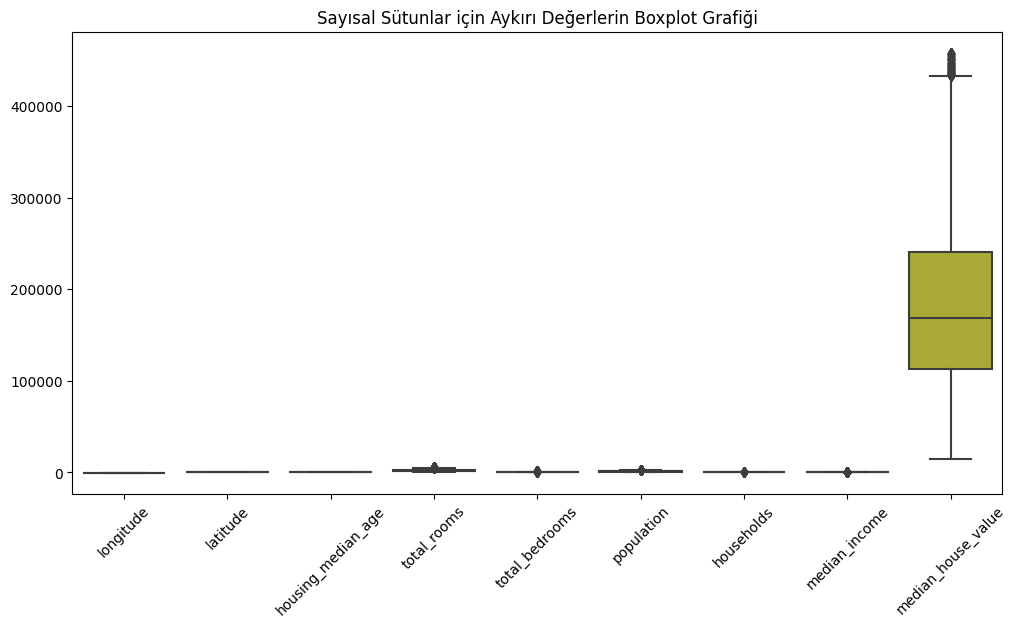

In [37]:
def remove_outliers_IQR(data, columns):
    """
    Belirtilen sütunlar için IQR metodunu kullanarak aykırı değerleri temizleyen fonksiyon.
    :param data: Veri çerçevesi (DataFrame)
    :param columns: Aykırı değer kontrolü yapılacak sütunların listesi
    :return: Aykırı değerlerden arındırılmış veri çerçevesi
    """
    data_clean = data.copy()
    for col in columns:
        # Q1 ve Q3 değerlerini hesapla
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        # Alt ve üst sınırları belirle
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Yorum: '{}' sütunundaki aykırı değerler, {} ile {} arasındaki değerlere sahip olacak şekilde filtrelendi.
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]
    return data_clean

# Sadece sayısal sütunlarda aykırı değer temizliği yapıyoruz.
df = remove_outliers_IQR(df, numeric_cols)
print("\nAykırı değerler temizlendi.")

# Aykırı değerlerin görselleştirilmesi için boxplot çizimi
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Sayısal Sütunlar için Aykırı Değerlerin Boxplot Grafiği")
plt.xticks(rotation=45)
plt.show()

In [38]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.922658,-0.083177,-0.013926,0.026537,0.113011,0.025607,-0.003604,-0.038379,-0.078107,0.010807,-0.456242,0.056735
latitude,-0.922658,1.000000,-0.017547,0.014667,-0.037993,-0.143560,-0.063142,-0.090227,-0.163546,0.373432,-0.018651,0.334515,-0.171741
housing_median_age,-0.083177,-0.017547,1.000000,-0.280751,-0.210470,-0.174085,-0.180139,-0.172825,0.090872,-0.241106,0.017943,0.253657,0.016104
total_rooms,-0.013926,0.014667,-0.280751,1.000000,0.876950,0.759772,0.874317,0.303758,0.202045,0.009967,-0.008345,-0.013927,0.014838
total_bedrooms,0.026537,-0.037993,-0.210470,0.876950,1.000000,0.809153,0.960750,-0.013696,0.089335,-0.046192,-0.000556,-0.011434,0.053584
population,0.113011,-0.143560,-0.174085,0.759772,0.809153,1.000000,0.859519,0.019583,-0.008078,-0.079888,-0.015074,-0.073611,-0.012801
households,0.025607,-0.063142,-0.180139,0.874317,0.960750,0.859519,1.000000,0.034122,0.121735,-0.091692,-0.011352,-0.000522,0.053236
median_income,-0.003604,-0.090227,-0.172825,0.303758,-0.013696,0.019583,0.034122,1.000000,0.635459,-0.236597,-0.009900,0.049829,-0.000819
median_house_value,-0.038379,-0.163546,0.090872,0.202045,0.089335,-0.008078,0.121735,0.635459,1.000000,-0.513782,0.036466,0.155785,0.141471
ocean_proximity_INLAND,-0.078107,0.373432,-0.241106,0.009967,-0.046192,-0.079888,-0.091692,-0.236597,-0.513782,1.000000,-0.012292,-0.247629,-0.270699


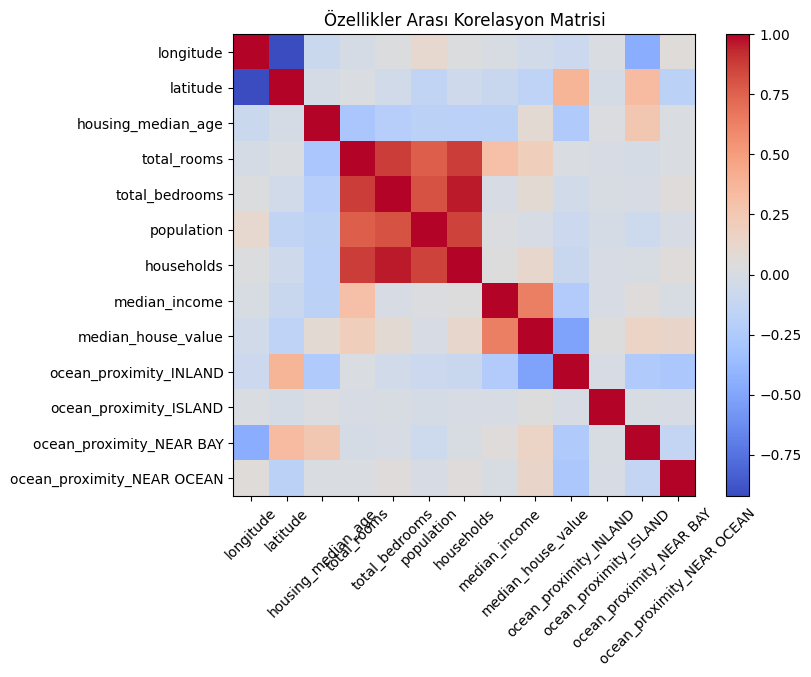

In [39]:
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="none")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Özellikler Arası Korelasyon Matrisi")
plt.show()

In [55]:
#-------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Model Eğitimi Öncesi Ön Hazırlık

In [48]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nEğitim verisinin boyutu:", X_train.shape)
print("Test verisinin boyutu:", X_test.shape)


Eğitim verisinin boyutu: (13516, 12)
Test verisinin boyutu: (3380, 12)


In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Model Eğitimi

In [50]:
pipelines = {
    "Lineer Regresyon": Pipeline([
         ("scaler", StandardScaler()),
         ("model", LinearRegression())
     ]),
    "Karar Ağacı": Pipeline([
         ("scaler", StandardScaler()),
         ("model", DecisionTreeRegressor(random_state=42))
     ]),
    "Random Forest": Pipeline([
         ("scaler", StandardScaler()),
         ("model", RandomForestRegressor(random_state=42))
     ]),
    "Gradient Boosting": Pipeline([
         ("scaler", StandardScaler()),
         ("model", GradientBoostingRegressor(random_state=42))
     ])
}

# Her modelin pipeline yapısı ile eğitilmesi ve performans metriklerinin hesaplanması
results_pipeline = {}

for name, pipe in pipelines.items():
    try:
        # Pipeline içinde önce scaler uygulanır, ardından model eğitilir.
        pipe.fit(X_train, y_train)
        # Test verisi üzerinde tahmin yapılması
        y_pred = pipe.predict(X_test)
        # Hata metriklerinin hesaplanması
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results_pipeline[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
        print(f"{name} modeli için - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")
    except Exception as e:
        print(f"{name} modelinde hata oluştu: {e}")

Lineer Regresyon modeli için - MSE: 3277337817.67, RMSE: 57248.04, MAE: 42710.52, R2: 0.61
Karar Ağacı modeli için - MSE: 3880555253.73, RMSE: 62294.10, MAE: 41458.70, R2: 0.54
Random Forest modeli için - MSE: 1898658423.47, RMSE: 43573.60, MAE: 29244.87, R2: 0.77
Gradient Boosting modeli için - MSE: 2441917420.21, RMSE: 49415.76, MAE: 35223.90, R2: 0.71


In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------
#Sonuçların Görselleştirilmesi

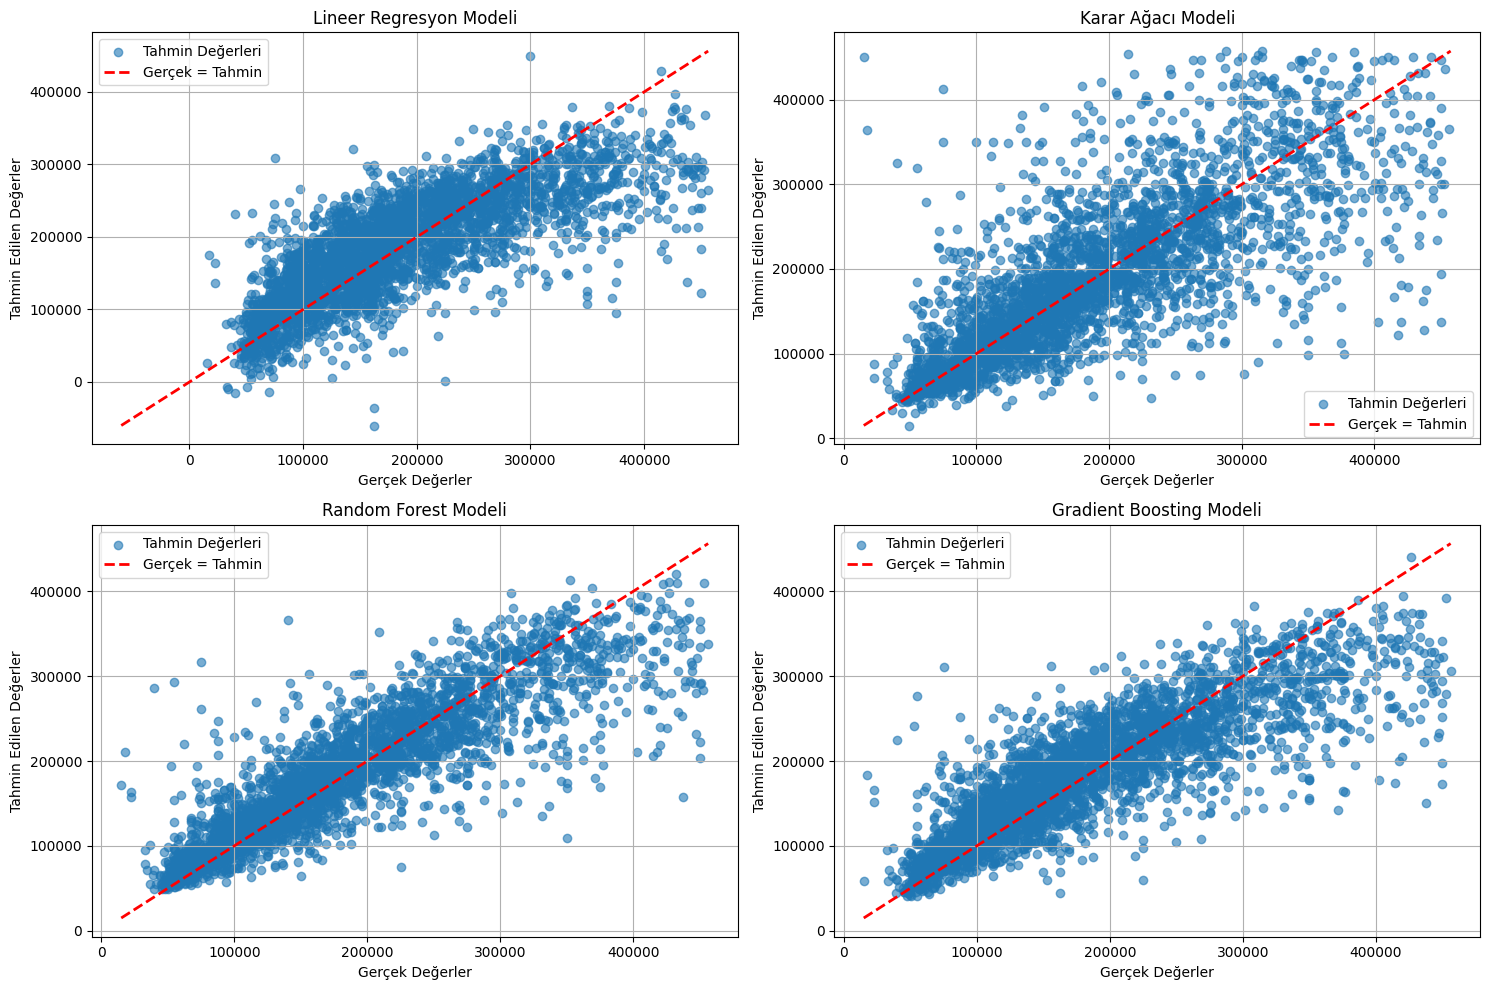

In [52]:
model_names = list(pipelines.keys())

# 2x2 alt grafik (subplot) düzeni oluşturuyoruz (4 model için)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # İndeksleme kolaylığı için düzleştiriyoruz

# Her model için gerçek ve tahmin edilen değerlerin karşılaştırıldığı grafik oluşturuluyor.
for idx, model_name in enumerate(model_names):
    # Pipeline üzerinden tahminleri alıyoruz.
    pipe = pipelines[model_name]
    y_pred = pipe.predict(X_test)
    
    ax = axes[idx]
    # Gerçek değerler ile tahmin değerlerini scatter plot ile çiziyoruz.
    ax.scatter(y_test, y_pred, alpha=0.6, label='Tahmin Değerleri')
    
    # Gerçek = Tahmin referans çizgisi (y = x çizgisi) ekliyoruz.
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Gerçek = Tahmin')
    
    # Grafik başlığı, eksen etiketleri ve legend ekleniyor.
    ax.set_title(f"{model_name} Modeli")
    ax.set_xlabel("Gerçek Değerler")
    ax.set_ylabel("Tahmin Edilen Değerler")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

C:\Users\Furkan\AppData\Local\Temp\ipykernel_2184\2974016775.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45)
C:\Users\Furkan\AppData\Local\Temp\ipykernel_2184\2974016775.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45)
C:\Users\Furkan\AppData\Local\Temp\ipykernel_2184\2974016775.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45)
C:\Users\Furkan\AppData\Local\Temp\ipykernel_2184\2974016775.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45)


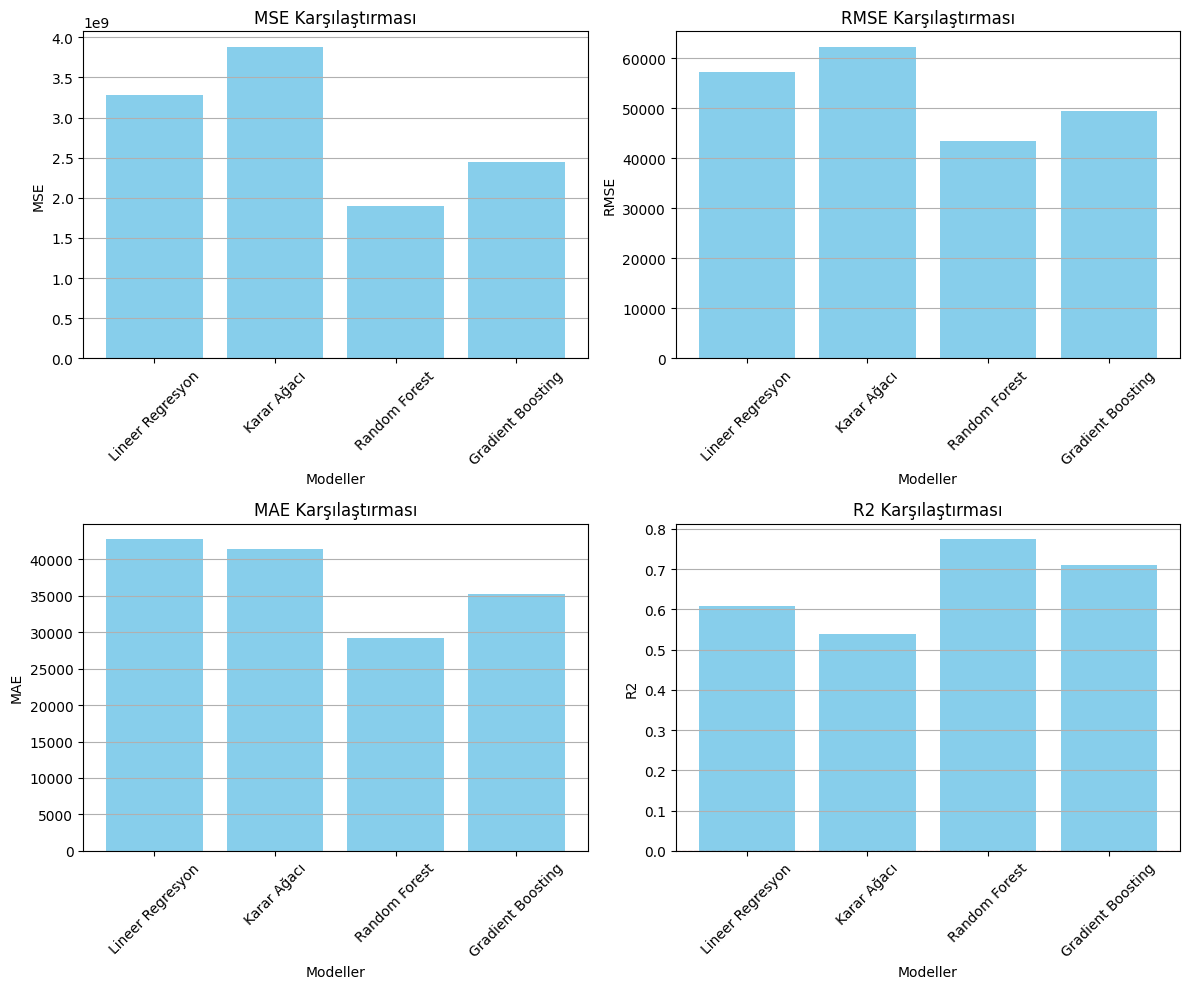

In [51]:
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
model_names = list(results_pipeline.keys())

# 4 metriği gösterecek şekilde 2x2'lik subplot yapısı oluşturuluyor.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Her bir metrik için ayrı bar grafiği çiziyoruz.
for ax, metric in zip(axes.flatten(), metrics):
    # Her model için ilgili metrik değerlerini listeye aktarıyoruz.
    values = [results_pipeline[model][metric] for model in model_names]
    ax.bar(model_names, values, color='skyblue')
    
    # Grafik başlığı ve eksen isimleri ayarlanıyor.
    ax.set_title(f"{metric} Karşılaştırması")
    ax.set_xlabel("Modeller")
    ax.set_ylabel(metric)
    ax.grid(True, axis='y')  # Y ekseni için ızgara çizgileri ekleniyor.
    
    # Model isimlerinin okunabilirliği için x-etiketleri döndürülüyor.
    ax.set_xticklabels(model_names, rotation=45)
    
    # Eğer R2 metriği ise referans olarak 0 çizgisi ekleniyor.
    if metric == 'R2':
        ax.axhline(0, color='red', linewidth=0.8, linestyle='--')

# Grafikler arasındaki boşlukları otomatik düzenleme
plt.tight_layout()
plt.show()


In [ ]:
#En iyi sonucu veren model için hiperparametre ayarlaması

In [54]:
# 8. Random Forest için Hiperparametre Ayarlaması (GridSearchCV)
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)
print("En iyi parametreler (RandomForest):", grid_search.best_params_)

En iyi parametreler (RandomForest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


==== Eğitim Seti Performansı ====
MSE: 247867530.18
RMSE: 15743.81
MAE: 10593.09
R2: 0.97
Accuracy (tolerance=%10): 81.77%

==== Test Seti Performansı ====
MSE: 1899037038.72
RMSE: 43577.94
MAE: 29240.24
R2: 0.77
Accuracy (tolerance=%10): 43.58%


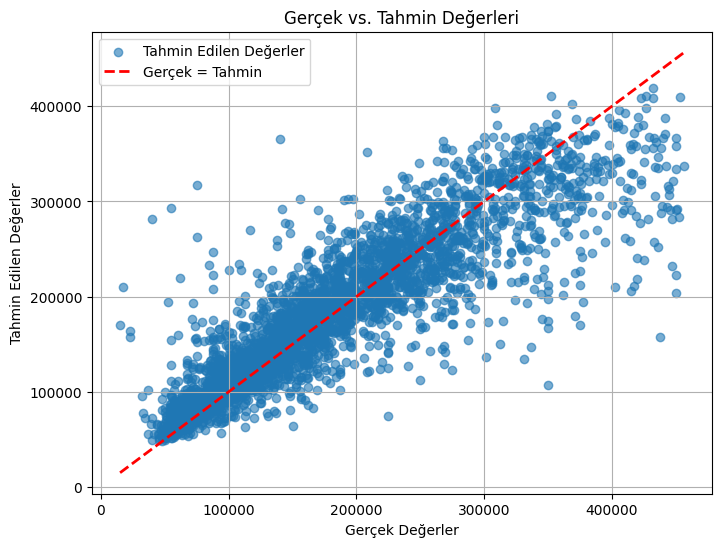

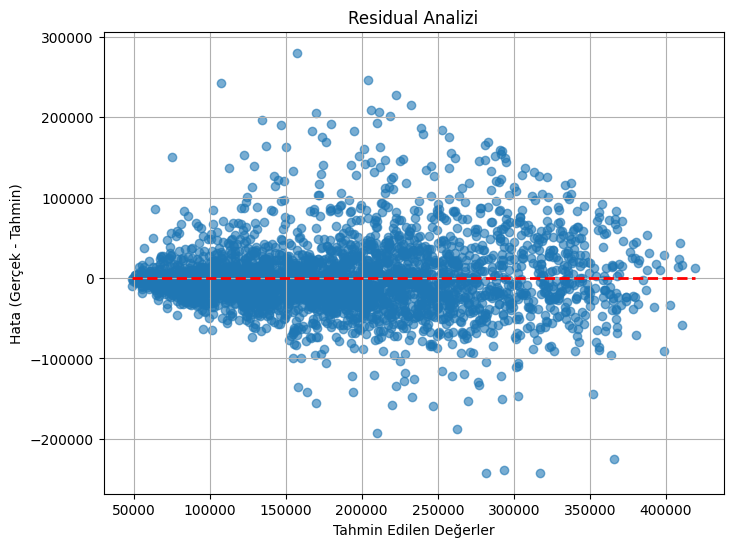

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_train, y_train, X_test, y_test, tolerance=0.10):
    """
    Verilen modelin eğitim ve test setleri üzerindeki performansını hesaplar, grafiklerle gösterir ve
    doğruluk (accuracy) metriğini belirli bir tolerans dahilinde hesaplar.
    
    Parametreler:
        model: Eğitilmiş model
        X_train, y_train: Eğitim verileri ve etiketleri
        X_test, y_test: Test verileri ve etiketleri
        tolerance: Yüzde hata toleransı (varsayılan: %10 -> 0.10)
        
    Not: Accuracy metriği, tahmin edilen değerin gerçek değerden sapmasının (göreceli hata) belirtilen tolerans altında kalma oranıdır.
    """
    
    # Eğitim ve test seti üzerinde tahminler yapma
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    # Performans metriklerini hesaplama (Eğitim)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    # Eğitim için accuracy hesaplanması: Gerçek değerin yüzde 10 sapma içerisinde olup olmadığı
    accuracy_train = np.mean((np.abs(y_train - y_train_pred) / y_train) < tolerance)
    
    # Performans metriklerini hesaplama (Test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    # Test için accuracy hesaplanması
    accuracy_test = np.mean((np.abs(y_test - y_test_pred) / y_test) < tolerance)
    
    # Metriğin yazdırılması
    print("==== Eğitim Seti Performansı ====")
    print(f"MSE: {mse_train:.2f}")
    print(f"RMSE: {rmse_train:.2f}")
    print(f"MAE: {mae_train:.2f}")
    print(f"R2: {r2_train:.2f}")
    print(f"Accuracy (tolerance=%{tolerance*100:.0f}): {accuracy_train*100:.2f}%")
    
    print("\n==== Test Seti Performansı ====")
    print(f"MSE: {mse_test:.2f}")
    print(f"RMSE: {rmse_test:.2f}")
    print(f"MAE: {mae_test:.2f}")
    print(f"R2: {r2_test:.2f}")
    print(f"Accuracy (tolerance=%{tolerance*100:.0f}): {accuracy_test*100:.2f}%")
    
    # Grafiksel gösterim: Gerçek vs. Tahmin (Test seti için)
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, label="Tahmin Edilen Değerler")
    # İdeal durum: Gerçek = Tahmin doğrusu
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Gerçek = Tahmin")
    plt.xlabel("Gerçek Değerler")
    plt.ylabel("Tahmin Edilen Değerler")
    plt.title("Gerçek vs. Tahmin Değerleri")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Grafiksel gösterim: Residual Analizi (Hata dağılımı)
    residuals = y_test - y_test_pred
    plt.figure(figsize=(8,6))
    plt.scatter(y_test_pred, residuals, alpha=0.6)
    plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='--', lw=2)
    plt.xlabel("Tahmin Edilen Değerler")
    plt.ylabel("Hata (Gerçek - Tahmin)")
    plt.title("Residual Analizi")
    plt.grid(True)
    plt.show()

# Örneğin grid_search ile elde ettiğimiz best_forest_model varsa:
best_forest_model = grid_search.best_estimator_
evaluate_model(best_forest_model, X_train, y_train, X_test, y_test, tolerance=0.10)


In [ ]:
#---------------------------------------------------------------------------------------------------------------------------
#En iyi parametrelerle modelin tekrar eğitilmesi

Best Forest Model yeniden eğitildi.

Eğitim Seti Sonuçları:
MSE: 247867530.18418726
RMSE: 15743.809265364824
MAE: 10593.093587599882
R2: 0.9708135997961059

Test Seti Sonuçları:
MSE: 1899037038.723273
RMSE: 43577.94211207401
MAE: 29240.240784023666
R2: 0.7738185344648083


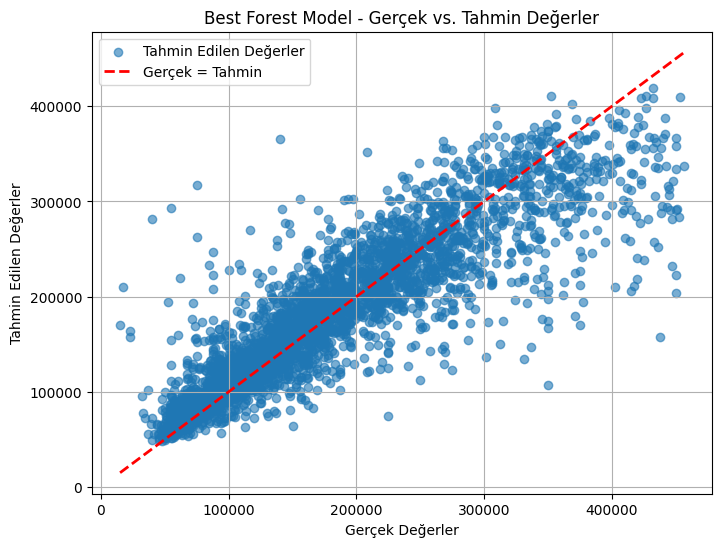

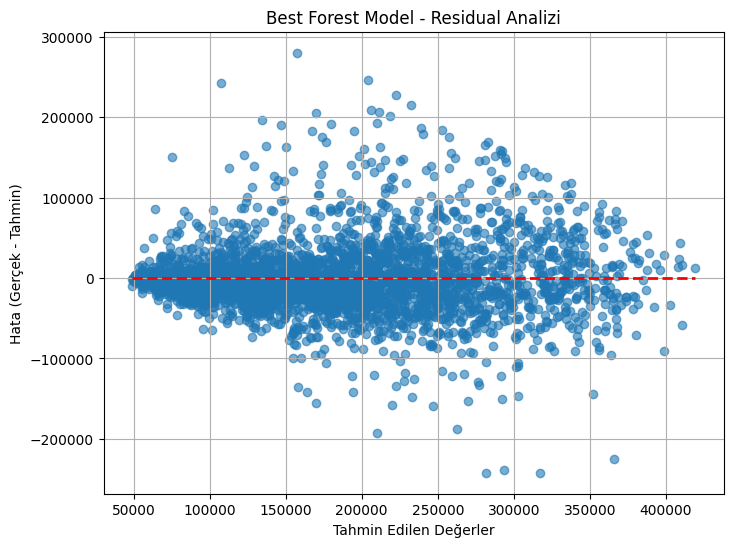

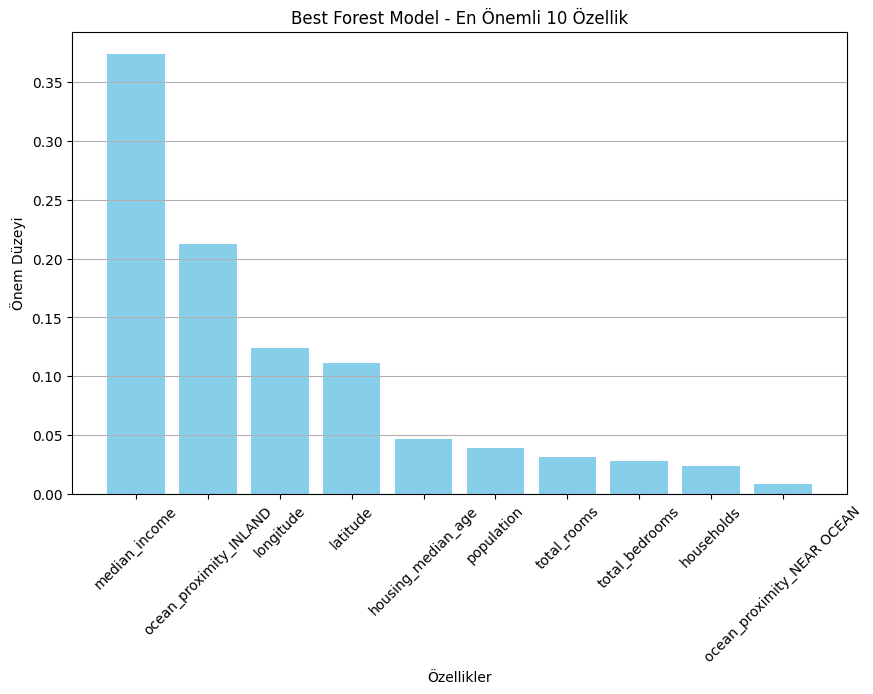

In [58]:
# Gerekli kütüphanelerin import edilmesi
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# =============================================================================
# Best_Forest_Model için Yeniden Model Eğitimi ve Değerlendirme
# =============================================================================

# best_forest_model: GridSearchCV ile bulunan en iyi model
# (Daha önceden grid_search.best_estimator_ olarak elde edilmiştir.)

# Modeli eğitim seti ile yeniden eğitiyoruz.
best_forest_model.fit(X_train, y_train)
print("Best Forest Model yeniden eğitildi.")

# Eğitim ve test seti üzerinde tahminler alınıyor.
y_train_pred = best_forest_model.predict(X_train)
y_test_pred = best_forest_model.predict(X_test)

# =============================================================================
# Performans Metriklerinin Hesaplanması
# =============================================================================

# Eğitim seti için hata metrikleri
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test seti için hata metrikleri
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nEğitim Seti Sonuçları:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R2:", r2_train)

print("\nTest Seti Sonuçları:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R2:", r2_test)

# =============================================================================
# Grafiksel Gösterim: Gerçek Değerler vs. Tahmin Edilen Değerler (Scatter Plot)
# =============================================================================

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Tahmin Edilen Değerler')
# Gerçek = Tahmin referans doğrusu (y = x)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Gerçek = Tahmin')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Best Forest Model - Gerçek vs. Tahmin Değerler")
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# Grafiksel Gösterim: Residual Analizi (Hata Dağılımı)
# =============================================================================

# Hata (residual) hesaplanması: Gerçek - Tahmin
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='--', lw=2)
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Hata (Gerçek - Tahmin)")
plt.title("Best Forest Model - Residual Analizi")
plt.grid(True)
plt.show()

# =============================================================================
# Grafiksel Gösterim: Özellik Önem Düzeyleri (Feature Importances)
# =============================================================================

# Eğer veri setinizde çok sayıda özellik varsa, en önemli 10 özelliği görselleştirebilirsiniz.
feature_importances = best_forest_model.feature_importances_
features = X_train.columns

# Özellik ve önem değerlerini DataFrame olarak düzenleyip, sıralama yapılması
importances_df = pd.DataFrame({
    'Özellik': features,
    'Önem': feature_importances
}).sort_values(by='Önem', ascending=False)

# En önemli 10 özellik için bar plot çizimi
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Özellik'].head(10), importances_df['Önem'].head(10), color='skyblue')
plt.xlabel("Özellikler")
plt.ylabel("Önem Düzeyi")
plt.title("Best Forest Model - En Önemli 10 Özellik")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()
